In [1]:
import nengo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
ens_params = dict(
    encoders=[[1], [1], [1], [1]],
    intercepts=[-0.5, -0.1, 0.1, 0.5],
    max_rates=[250, 300, 300, 250],
    neuron_type=nengo.LIFRate())

In [12]:
with nengo.Network() as model:
    in_nd = nengo.Node(lambda t: 4*t-1)
    ens = nengo.Ensemble(4, 1, **ens_params)
    sum_nd = nengo.Node(size_in=4)
    means_ens = nengo.Node(size_in=1)
    mean_ground = nengo.Node(lambda t, x: np.mean(x), size_in=1)
    
    nengo.Connection(in_nd, ens, synapse=None, function=lambda x: x/4)
    nengo.Connection(ens.neurons, mean_nd, function=lambda x: np.sum(x) / 4)
    
    p_in = nengo.Probe(in_nd)
    p_approx = nengo.Probe(mean_nd)
    p_ground = nengo.Probe(mean_ground)

ValidationError: Connection.function: function can only be set for connections from an Ensemble or Node (got type 'Neurons')

In [8]:
with nengo.Simulator(model) as sim:
    sim.run(.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

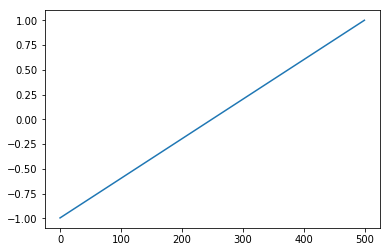

In [9]:
plt.plot(sim.data[p_in])